## CODECLAUSE INTERNSHIP 
## TASK- Churn Prediction in Telecom Industry using Logistic Regression

### Importing all necessary libraries

In [1]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing numpy and panda packages
import numpy as np
import pandas as pd

# Importing Data Visualisation libraries
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly.express as px

### Reading and Understanding the Data 

In [2]:
# Importing all datasets
customer_data = pd.read_csv("C:/Users/asus/Downloads/customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [3]:
print(customer_data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], dtype='object')


In [4]:
print(customer_data.tail)

<bound method NDFrame.tail of       customerID  gender  SeniorCitizen Partner Dependents
0     7590-VHVEG  Female              0     Yes         No
1     5575-GNVDE    Male              0      No         No
2     3668-QPYBK    Male              0      No         No
3     7795-CFOCW    Male              0      No         No
4     9237-HQITU  Female              0      No         No
...          ...     ...            ...     ...        ...
7038  6840-RESVB    Male              0     Yes        Yes
7039  2234-XADUH  Female              0     Yes        Yes
7040  4801-JZAZL  Female              0     Yes        Yes
7041  8361-LTMKD    Male              1     Yes         No
7042  3186-AJIEK    Male              0      No         No

[7043 rows x 5 columns]>


In [5]:
churn_data = pd.read_csv('C:/Users/asus/Downloads/churn_data.csv')
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
print(churn_data.columns)

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [7]:
internet_data = pd.read_csv('C:/Users/asus/Downloads/internet_data.csv')
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [8]:
print(internet_data.columns)

Index(['customerID', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies'],
      dtype='object')


### Merging all datasets based on condition ("customer_id ")

In [9]:
# Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [10]:
# Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

In [11]:
# Head of our Dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [12]:
# Dimensions of the dataframe
telecom.shape

(7043, 21)

In [13]:
#Statistical aspects of the dataframe
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [14]:
# Type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


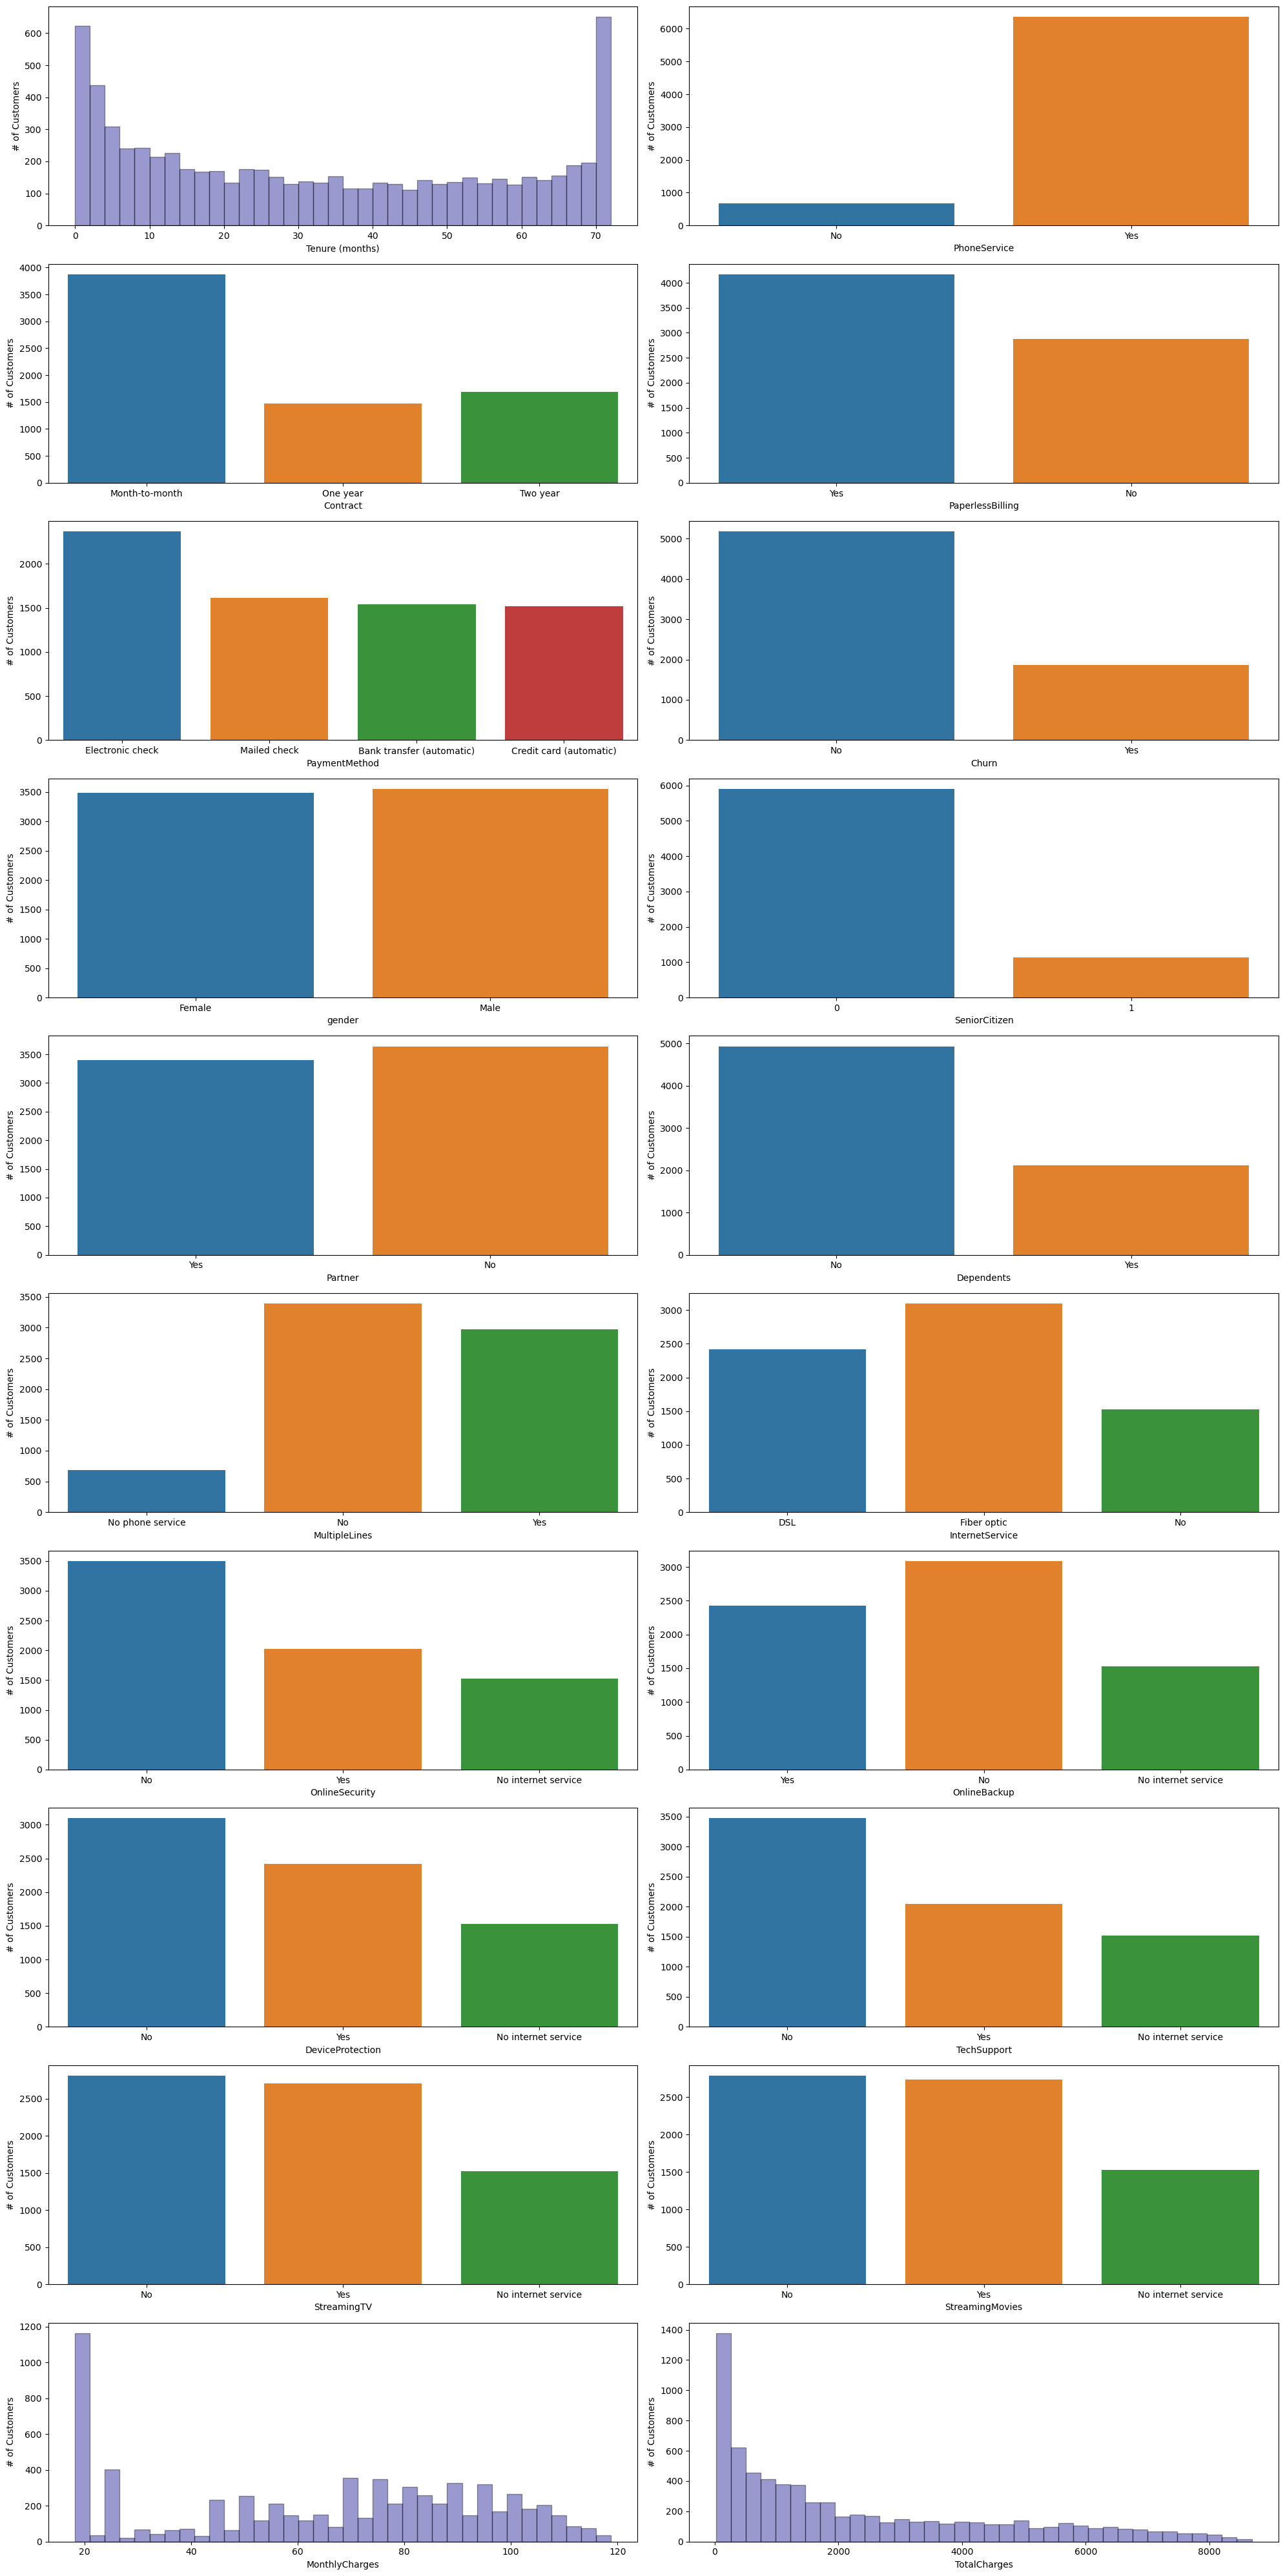

In [15]:
plt.figure(figsize=(20,40))
plt.subplot(10,2,1)
ax = sns.distplot(telecom['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
plt.subplot(10,2,2)

ax = sns.countplot(x='PhoneService', data=telecom)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,3)
ax =sns.countplot(x='Contract', data=telecom)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,3)
ax =sns.countplot(x='Contract', data=telecom)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,4)
ax =sns.countplot(x='PaperlessBilling', data=telecom)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,5)
ax =sns.countplot(x='PaymentMethod', data=telecom)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,6)
ax =sns.countplot(x='Churn', data=telecom)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,7)
ax =sns.countplot(x='gender', data=telecom)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,8)
ax =sns.countplot(x='SeniorCitizen', data=telecom)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,9)
ax =sns.countplot(x='Partner', data=telecom)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,10)
ax =sns.countplot(x='Dependents', data=telecom)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,11)
ax =sns.countplot(x='MultipleLines', data=telecom)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,12)
ax =sns.countplot(x='InternetService', data=telecom)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,13)
ax =sns.countplot(x='OnlineSecurity', data=telecom)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,14)
ax =sns.countplot(x='OnlineBackup', data=telecom)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,15)
ax =sns.countplot(x='DeviceProtection', data=telecom)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,16)
ax =sns.countplot(x='TechSupport', data=telecom)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,17)
ax =sns.countplot(x='StreamingTV', data=telecom)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,18)
ax =sns.countplot(x='StreamingMovies', data=telecom)
ax.set_ylabel('# of Customers')
plt.subplot(10,2,19)
ax = sns.distplot(telecom['MonthlyCharges'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('MonthlyCharges')

plt.subplot(10, 2, 20)
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce')  # Convert to numeric with NaN for non-numeric values
ax = sns.distplot(telecom['TotalCharges'], hist=True, kde=False, 
             bins=int(180/5), color='darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('TotalCharges')

plt.tight_layout()
plt.show()


### Data Cleaning

In [16]:
# Checking Null values
telecom.isnull().sum()

customerID           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
dtype: int64

##### There are no NULL values in the dataset, hence it is clean

### Total Charges

In [17]:
telecom['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [18]:
telecom['TotalCharges'] = telecom['TotalCharges'].replace(' ', np.nan)
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'])

In [19]:
value = (telecom['TotalCharges']/telecom['MonthlyCharges']).median()*telecom['MonthlyCharges']

In [20]:
telecom['TotalCharges'] = value.where(telecom['TotalCharges'] == np.nan, other =telecom['TotalCharges'])

In [21]:
telecom['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

### Churn (Target Variable)

In [22]:
telecom.Churn.describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

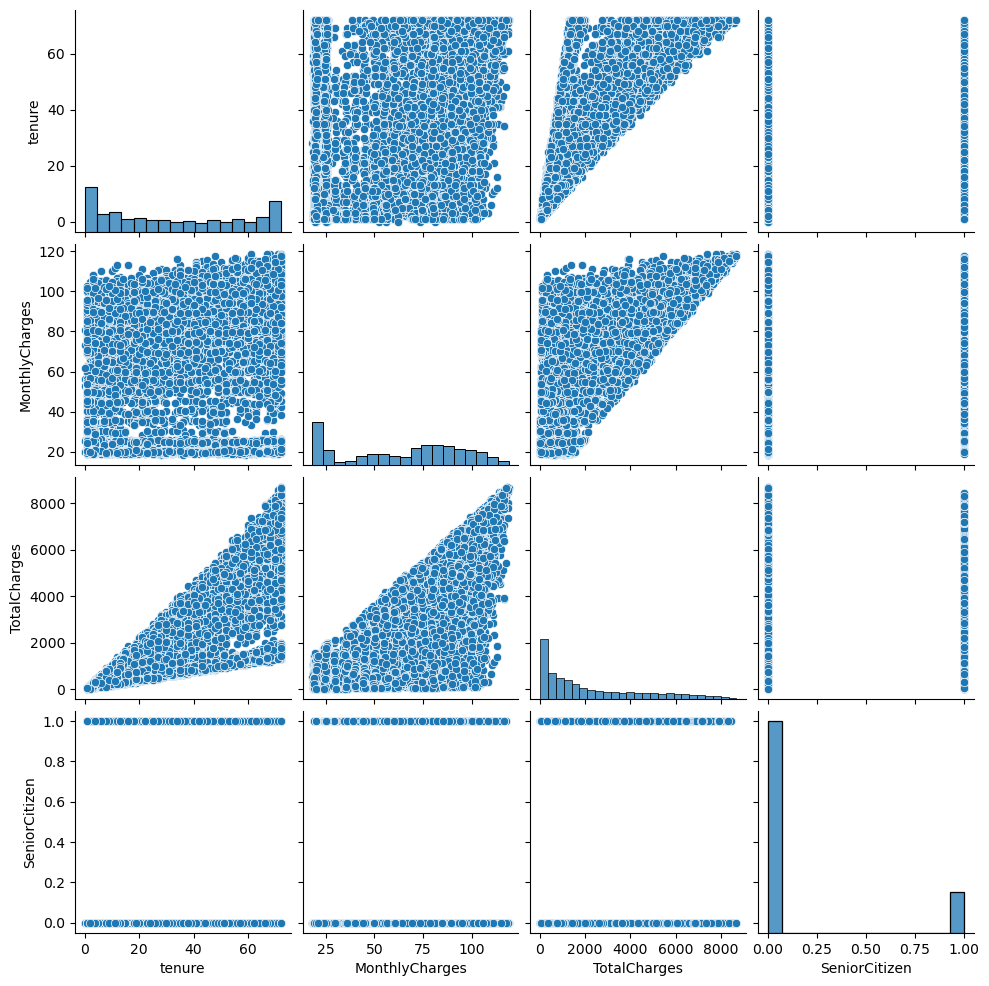

In [27]:
sns.pairplot(telecom)

array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>],
       [<AxesSubplot:title={'center':'TotalCharges'}>,
        <AxesSubplot:title={'center':'SeniorCitizen'}>]], dtype=object)

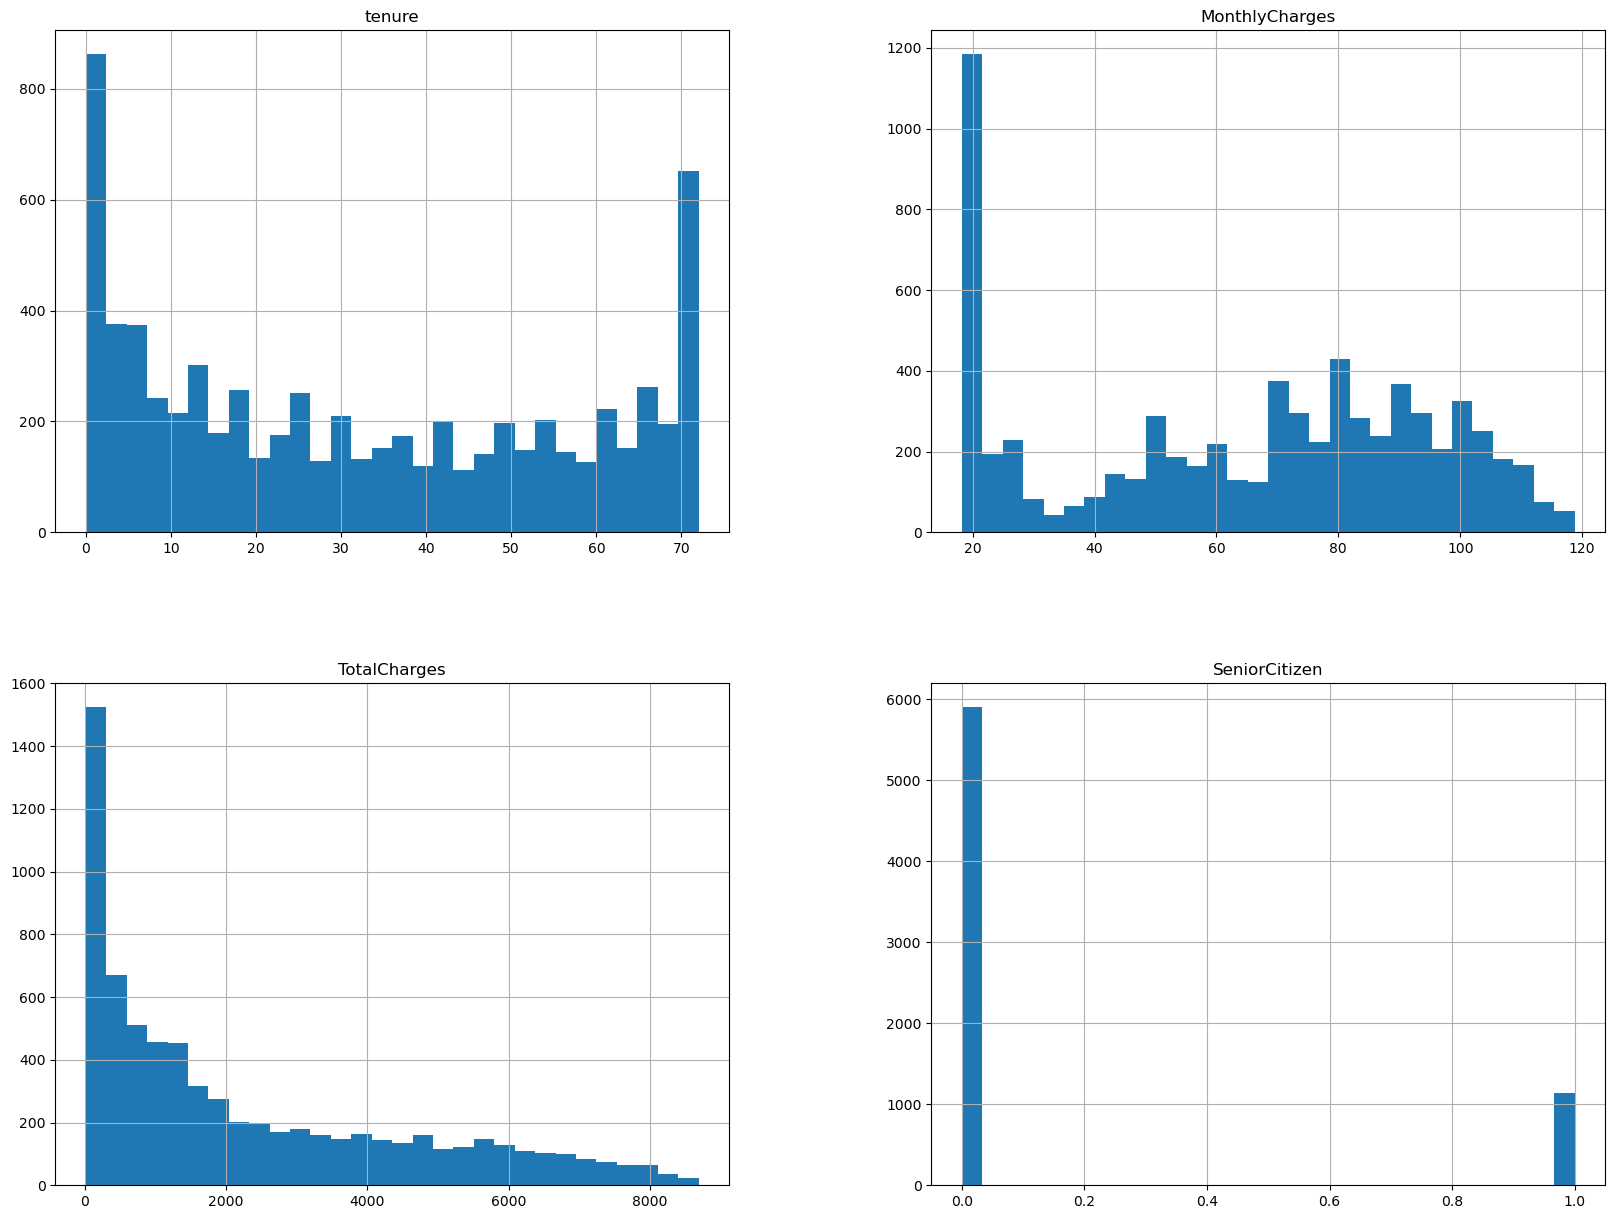

In [28]:
telecom.hist(bins=30, figsize=(20,15))

In [29]:
# Converting some binary variables (Yes/No) to (0/1)
telecom["Churn"]=telecom['Churn'].replace(['Yes','No'],[1,0])

In [30]:
telecom

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,0,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.50,0,Male,...,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,Female,...,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,Female,...,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.60,1,Male,...,Yes,No,Yes,Fiber optic,No,No,No,No,No,No


In [31]:
telecom_dummies=pd.get_dummies(telecom)

In [32]:
telecom_dummies

,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,29.85,29.85,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,34,56.95,1889.50,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0
2,2,53.85,108.15,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,45,42.30,1840.75,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,0
4,2,70.70,151.65,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
7039,72,103.20,7362.90,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,1
7040,11,29.60,346.45,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
7041,4,74.40,306.60,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


### For categorical variables with multiple levels, creating dummy features 

In [33]:
telecom_dummies=pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)
telecom = pd.concat([telecom, telecom_dummies], axis=1)

In [34]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0


In [35]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)


# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)


# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)


# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)


# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)


# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)


# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)


In [36]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


#### Dropping the repeated variables

In [37]:
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [38]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   object 
 3   PaperlessBilling                       7043 non-null   object 
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   object 
 9   Dependents                             7043 non-null   object 
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [62]:
num_telecom.describe(percentiles=[.25, .5, .64, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
64%,44.000000,80.800000,0.000000,2448.412000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000


#### Checking mIssing Values and inputing them

In [41]:
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [63]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [44]:
# Checking percentage of missing values after removing the missing values

round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

### Logistic Regression

In [87]:
from sklearn.preprocessing import MinMaxScaler

y=telecom['Churn'].values
x=telecom.drop(columns=['Churn'])

# Preprocess non-numeric columns
non_numeric_cols = x.select_dtypes(include=['object']).columns
x[non_numeric_cols] = x[non_numeric_cols].astype('category').apply(lambda x: x.cat.codes)

# Scale the numeric columns
scaler = MinMaxScaler(feature_range=(0, 1))
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [96]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(x_train[['tenure','MonthlyCharges','TotalCharges']])
x_train.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,6559,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
5790,672,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,...,0,1,1,0,1,0,0,1,0,1
6498,508,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
880,6936,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,5175,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,...,1,0,0,1,0,1,0,1,0,1


In [108]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
result=model.fit(x_train,y_train)


In [109]:
#Checking the accuracy
from sklearn import metrics
prediction_test=model.predict(x_test)
print(metrics.accuracy_score(y_test,prediction_test))

0.7587677725118483


AxesSubplot(0.125,0.11;0.775x0.77)


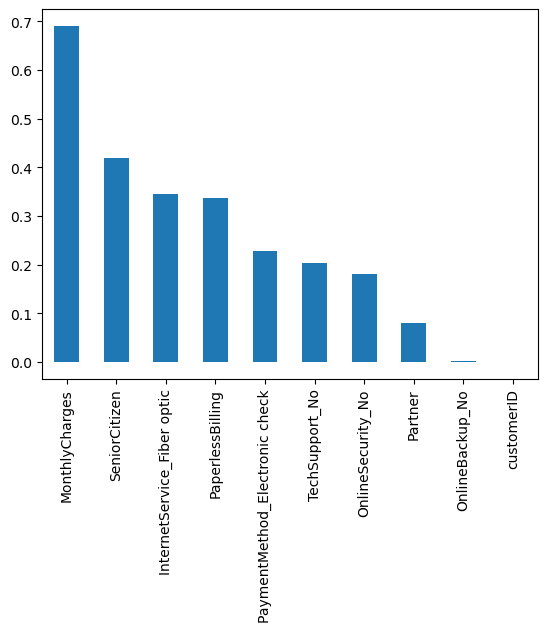

In [104]:
weights = pd.Series(model.coef_[0], index=x.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))


AxesSubplot(0.125,0.11;0.775x0.77)


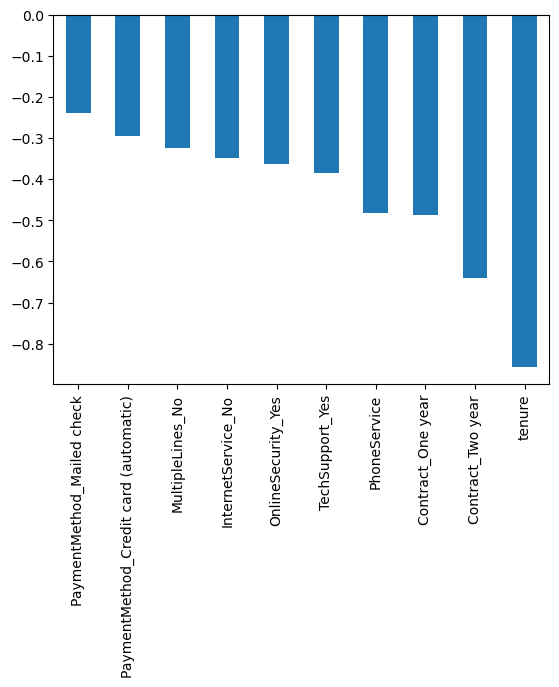

In [105]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))


### Looking at Correlations

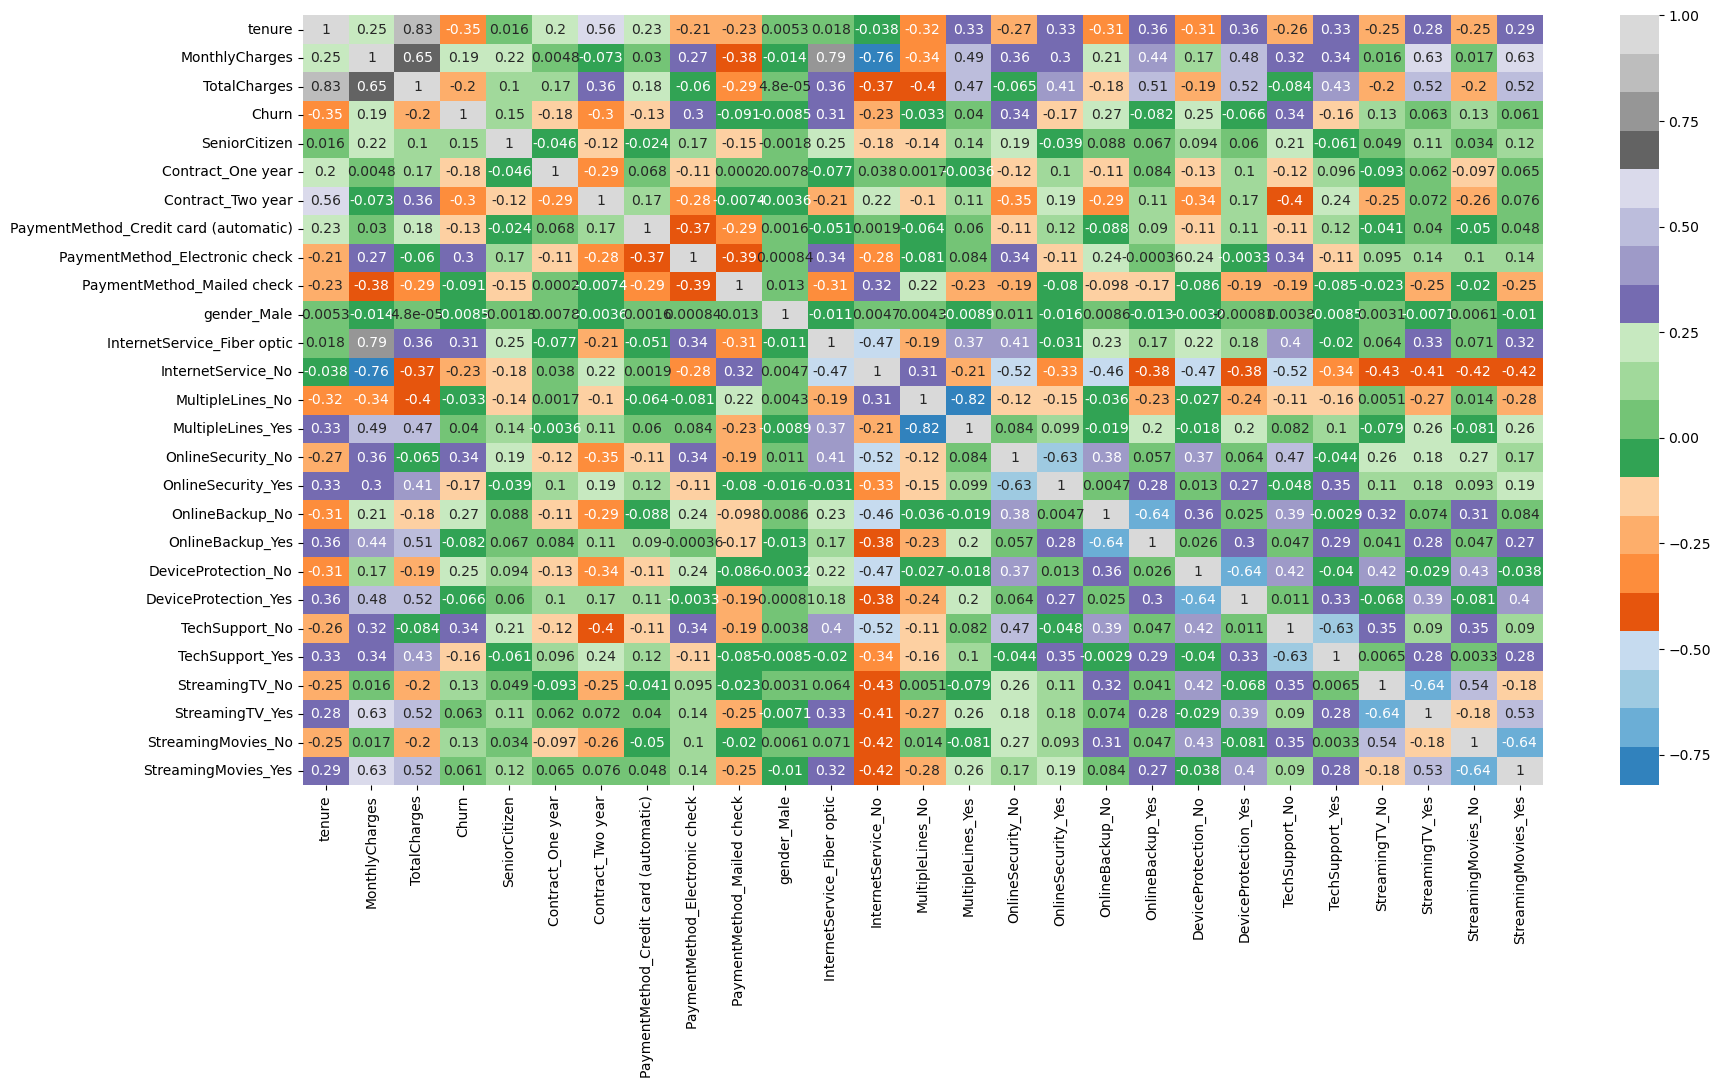

In [56]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True, cmap="tab20c")
plt.show()


<AxesSubplot:>

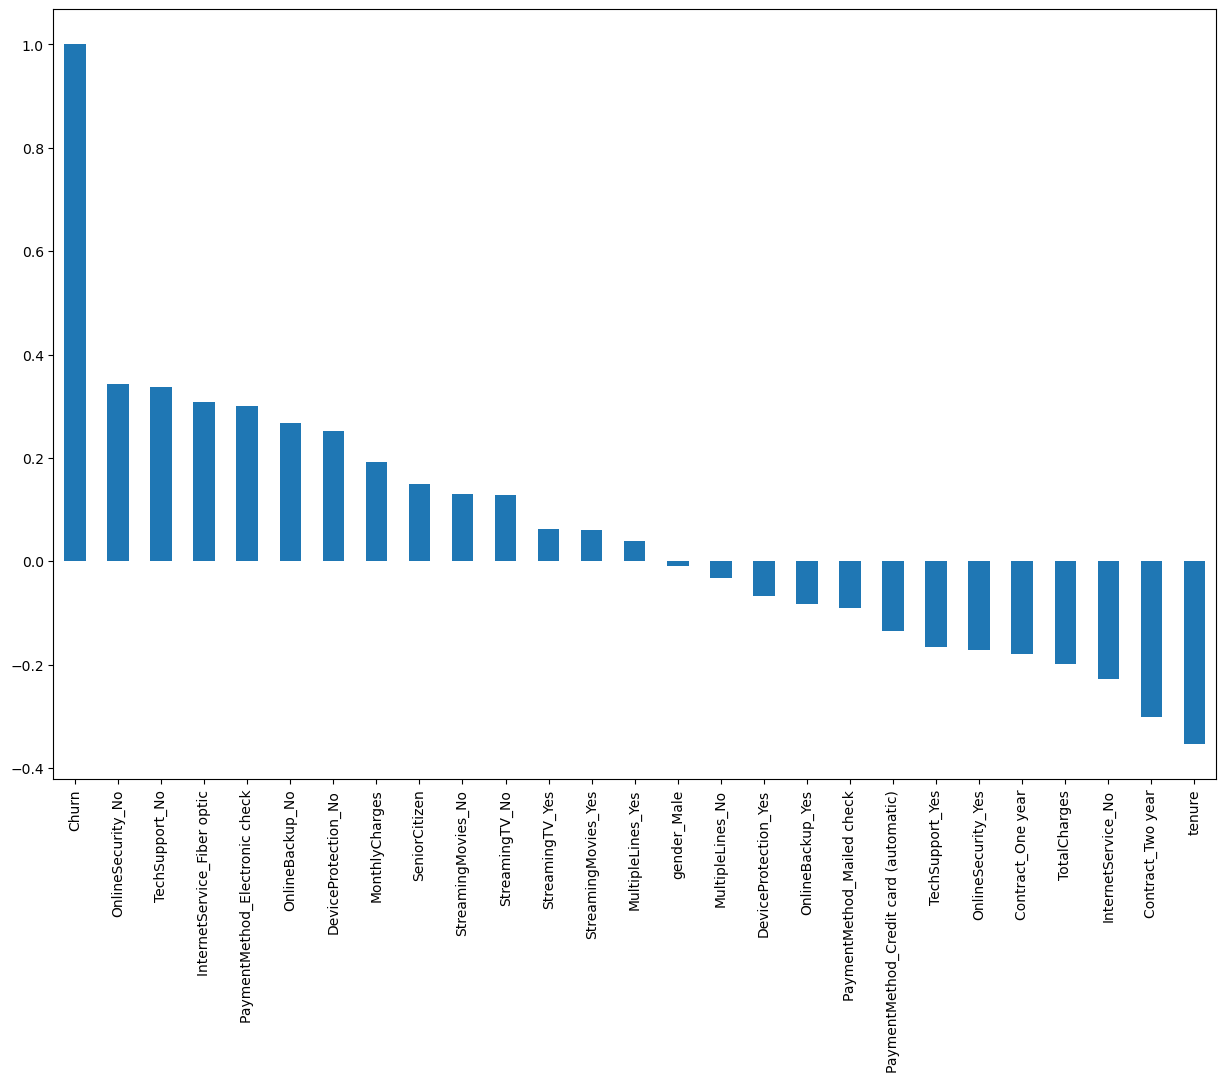

In [57]:
churn_corr_matrix=telecom.corr()
churn_corr_matrix['Churn'].sort_values(ascending=False).plot(kind='bar',figsize=(15,10))

In [58]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)


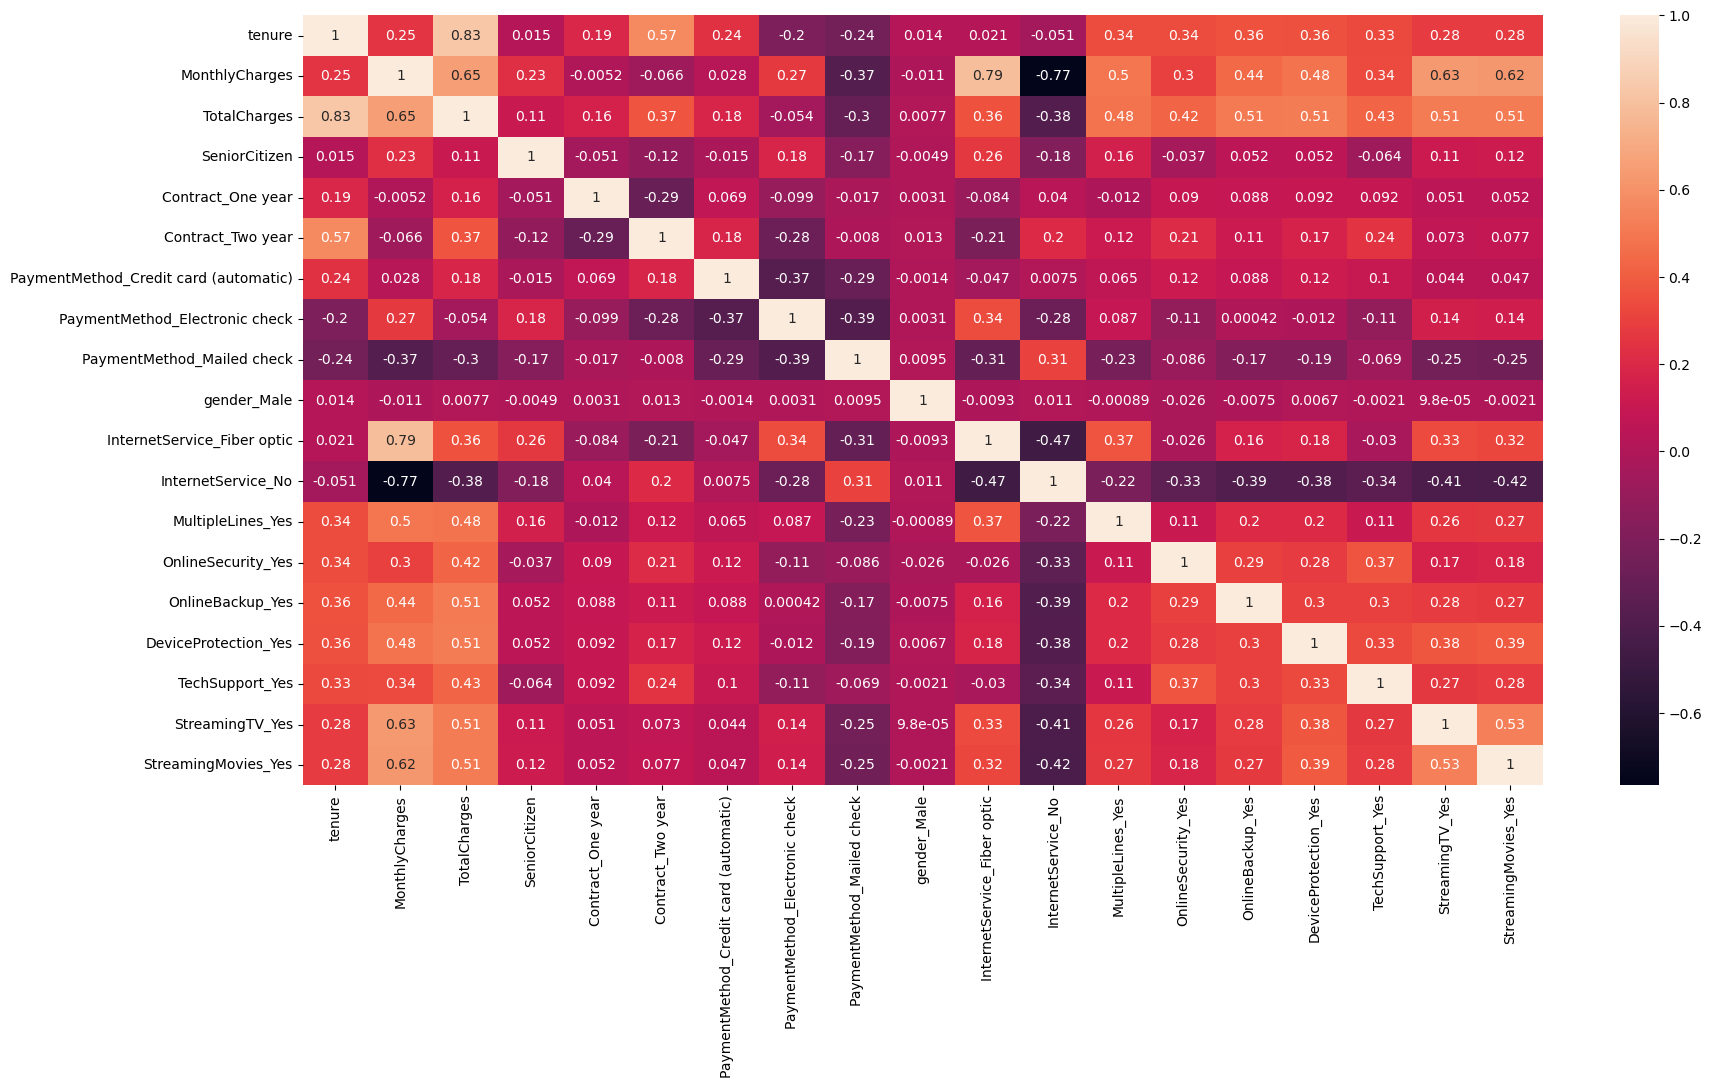

In [59]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()